In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Importing other required libraries

import bcolz                        #For compressing the images so that they dont cause a memory outage issue when the code is executed
from tqdm import tqdm               #For visualizing progress bars
import matplotlib.pyplot as plt     #Plotting library of Python
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid              #To display images in a grid format
import random
import keras                                               #Deep Learning Library
from keras.preprocessing.image import load_img             #Load image from a directory
from keras.preprocessing.image import img_to_array         #Convert all the images to an array
from keras.preprocessing.image import ImageDataGenerator   #Data Generator class of Keras which will aid in image augmentation

['test', 'train', 'labels.csv', 'sample_submission.csv']


Using TensorFlow backend.


## Reading the data sets present in the working directory of the Kernel

In [2]:
# Reading in the CSVs

df_train = pd.read_csv('../input/labels.csv')
df_test = pd.read_csv('../input/sample_submission.csv')

print("Training data set sample \n")
print(df_train.head(5))


print("\n Test data set sample \n")
print(df_test.head(5))

Training data set sample 

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

 Test data set sample 

                                 id        ...          yorkshire_terrier
0  000621fb3cbb32d8935728e48679680e        ...                   0.008333
1  00102ee9d8eb90812350685311fe5890        ...                   0.008333
2  0012a730dfa437f5f3613fb75efcd4ce        ...                   0.008333
3  001510bc8570bbeee98c8d80c8a95ec1        ...                   0.008333
4  001a5f3114548acdefa3d4da05474c2e        ...                   0.008333

[5 rows x 121 columns]


## Creating an empty bcolz array to store the image data

In [3]:
# Before we create the empty bcolz array we need to define the size of each of the image

# Size of the image as given in the problem is 300

im_size = 300
x_train = bcolz.zeros((0, im_size, im_size, 3), np.float32)
y_train = []

## Creating a master array which contains the data of all the images in the training set in the form of a matrix

In [4]:
for i,j in tqdm(df_train.values):
    image = load_img('../input/train/{}.jpg'.format(i), target_size=(im_size, im_size))
    x_train.append(img_to_array(image))
    y_train.append(j)

100%|██████████| 10222/10222 [01:05<00:00, 157.14it/s]


## Viewing the training array (Both in the form of a matrix and a picture) 

In [5]:
# Shape of the x_train array is
x_train.shape

# Output of the x_train.shape suggests that x_train contains the image data of all the 10222 images in the form of a matrix (of the order 300, 300, 3)
# Lets view how the 100th entry in the x_train matrix looks like
print("100th Image in the training data set is: \n",x_train[99], "\n")
print("And the lable of the correspoding image is: \n", y_train[99])

100th Image in the training data set is: 
 [[[ 8. 14. 36.]
  [ 1.  7. 29.]
  [26. 31. 51.]
  ...
  [10. 12. 11.]
  [ 7. 14. 20.]
  [ 7. 14. 20.]]

 [[ 6. 14. 35.]
  [16. 22. 44.]
  [20. 26. 48.]
  ...
  [10. 12. 11.]
  [ 9. 14. 18.]
  [ 9. 14. 18.]]

 [[48. 58. 85.]
  [18. 28. 53.]
  [54. 64. 89.]
  ...
  [ 8. 18.  9.]
  [13. 13. 11.]
  [13. 13. 11.]]

 ...

 [[49. 41. 38.]
  [51. 43. 41.]
  [58. 53. 50.]
  ...
  [51. 51. 51.]
  [51. 47. 46.]
  [53. 49. 48.]]

 [[50. 40. 38.]
  [77. 69. 66.]
  [88. 80. 77.]
  ...
  [49. 49. 49.]
  [50. 49. 47.]
  [52. 51. 49.]]

 [[50. 41. 36.]
  [67. 58. 53.]
  [91. 83. 80.]
  ...
  [47. 47. 47.]
  [50. 49. 47.]
  [52. 51. 49.]]] 

And the lable of the correspoding image is: 
 boxer


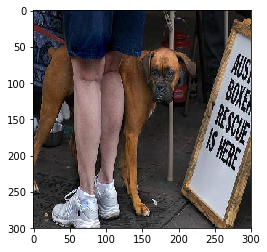

In [6]:
plt.imshow(x_train[99]/255)

# Dont know the reason behind: Why the image is being filled with white light if it is not divided by 255. Ask this to any of the buddies 

## Defining the function for Data Augmentation (Using ImageDataGenerator Class of Keras) 

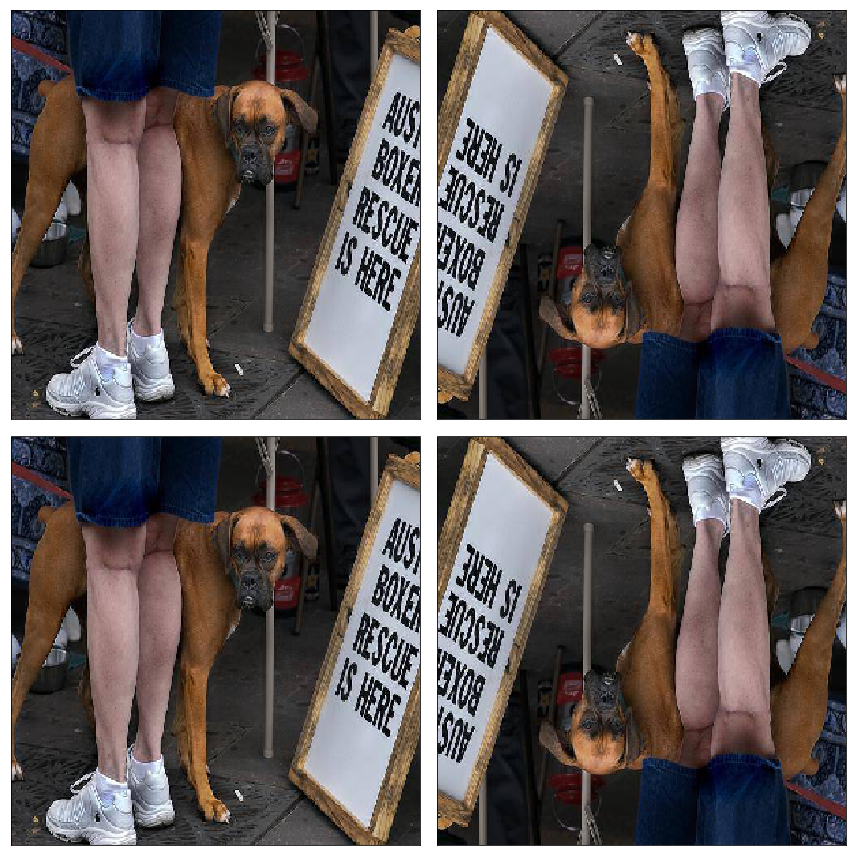

In [7]:
# The code below is for a sample example, where in we will try to flip the image

datagen = ImageDataGenerator()
img_to_test = 99
temp = np.zeros((16, im_size, im_size, 3), dtype = np.float32)

for i in range(16):
    if random.randint(1,101) < 50:
        flip_horizontal = True
    else:
        flip_horizontal = False
    if random.randint(1,101) < 50:
        flip_vertical = True
    else:
        flip_vertical = False

    temp[i] = datagen.apply_transform(x_train[img_to_test],{
        'flip_horizontal':flip_horizontal,
        'flip_vertical':flip_vertical
    })

def plotImages( images_arr, n_images=2):
    fig, axes = plt.subplots(n_images, n_images, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()

plotImages(temp[:,]/255.0)

In [8]:
def image_augmentation(x_train, y_train, batch_size = 2, re_size_factor = 0.8):
    
    """
    
    x_train = The master matrix containing all the images
    y_train = The lable vector containing lables of all the images
    batch_size = default parameter containing batch size of images which will be passed in the function
    re_size_factor = Proportion by which the cropped images will be resized
    
    """
    
    # Code for randomly selecting any two images from the entire training data set of ~10K images
    x = list(np.arange(0,x_train.shape[0])) #Generating a list of numbers between 0 and the number of images in the data set
    rand_samp = random.sample(x, batch_size)
    
    ################################################ Cropping Code Begins below ##################################################################
    
    # Creating an empty container where the cropped image will be stored
    crop_container = np.zeros((batch_size, int(x_train.shape[1]*re_size_factor), int(x_train.shape[2]*re_size_factor), 3),dtype = np.float32)
    for i in range(0,len(rand_samp)):
        x_lim1 = int(x_train.shape[1]*re_size_factor)
        y_lim1 = int(x_train.shape[2]*re_size_factor)
        x_lim2 = int(x_train.shape[1] - int(x_train.shape[1]*re_size_factor))
        y_lim2 = int(x_train.shape[2] - int(x_train.shape[2]*re_size_factor))
        center = 30
        
        if random.randint(0,101) < 20:
            #Bottom Left
            crop_container[i] = x_train[rand_samp[i],0:x_lim1, 0:y_lim1, :]
        elif random.randint(0,101) < 40:
            #Top Left
            crop_container[i] = x_train[rand_samp[i],0:x_lim1, y_lim2:x_train.shape[2], :]
        elif random.randint(0,101) < 60:
            #Bottom Right
            crop_container[i] = x_train[rand_samp[i],x_lim2:x_train.shape[1], 0:y_lim1, :]
        elif random.randint(0,101) < 80:
            #Top Right
            crop_container[i] = x_train[rand_samp[i],x_lim2:x_train.shape[1], y_lim2:x_train.shape[2], :]
        else:
            #Centre
            crop_container[i] = x_train[rand_samp[i],center:(x_train.shape[1] - center), center:(x_train.shape[2] - center), :]
        ################################################ Flipping Code Begins below ###############################################################
        
        datagen = ImageDataGenerator()
    
        if random.randint(1,101) < 50:
            flip_horizontal = True
        else:
            flip_horizontal = False
        if random.randint(1,101) < 50:
            flip_vertical = True
        else:
            flip_vertical = False
    
        crop_container[i] = datagen.apply_transform(crop_container[i],{
        'flip_horizontal':flip_horizontal,
        'flip_vertical':flip_vertical
        })
        
        ################################################ Flipping Code Ends ###############################################################
        
        # Displaying one of the source images
        plt.title(y_train[rand_samp[i]])
        plt.imshow(x_train[rand_samp[i],]/255.0)
        
        def plotImages(images_arr, n_images=2):
            fig, axes = plt.subplots(n_images-1, n_images, figsize=(12,12))
            axes = axes.flatten()
            for img, ax in zip( images_arr, axes):
                ax.imshow(img)
                ax.set_xticks(())
                ax.set_yticks(())
                plt.tight_layout()
        
        plotImages(crop_container[:,]/255.)

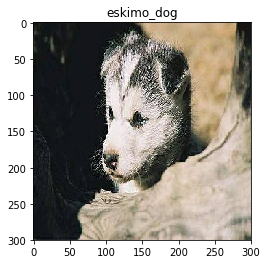

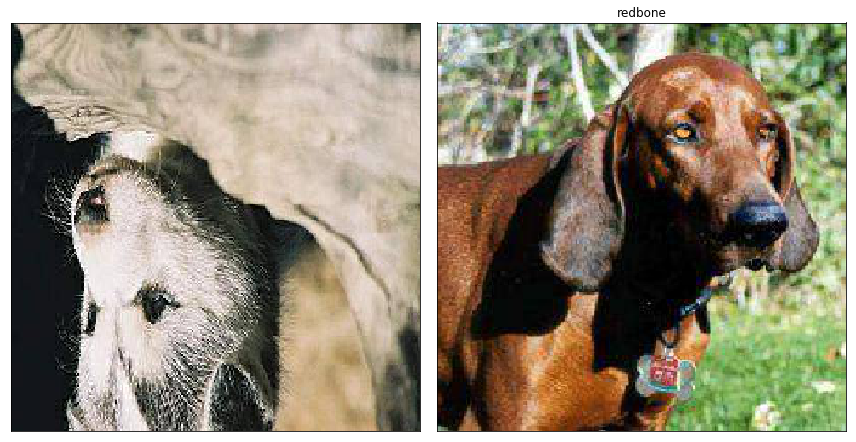

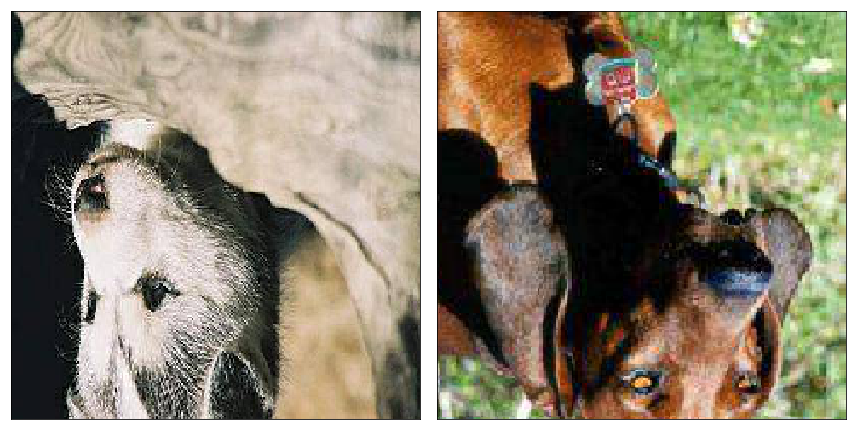

In [9]:
image_augmentation(x_train, y_train)